Part I: Explaratory Data Analysis of CSV Files


=== Analysis for Customers Dataset ===

Summary Statistics:
                            join_date          last_purchase_date  \
count                           10000                       10000   
unique                            NaN                         NaN   
top                               NaN                         NaN   
freq                              NaN                         NaN   
mean    2022-03-19 09:28:13.439999744  2023-04-25 18:26:12.480000   
min               2020-01-01 00:00:00         2020-01-26 00:00:00   
25%               2021-02-15 00:00:00         2022-09-19 00:00:00   
50%               2022-03-19 00:00:00         2023-08-04 00:00:00   
75%               2023-04-28 00:00:00         2024-02-11 00:00:00   
max               2024-05-31 00:00:00         2024-05-31 00:00:00   
std                               NaN                         NaN   

                age gender    location  
count   8991.000000   9467       10000  
unique          NaN      2  

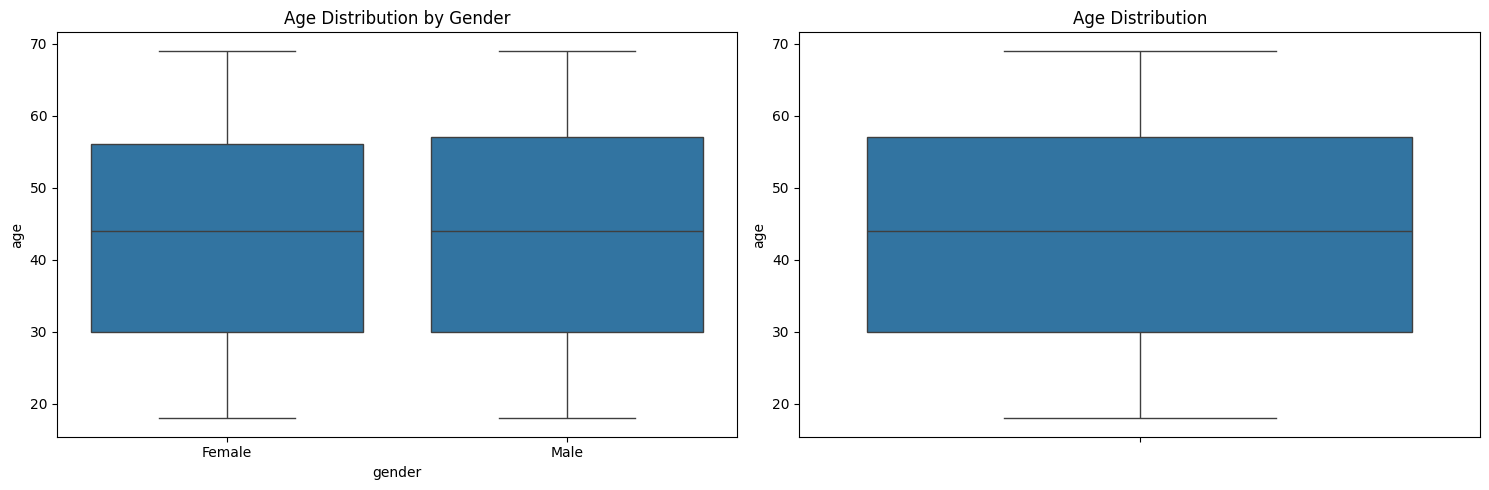

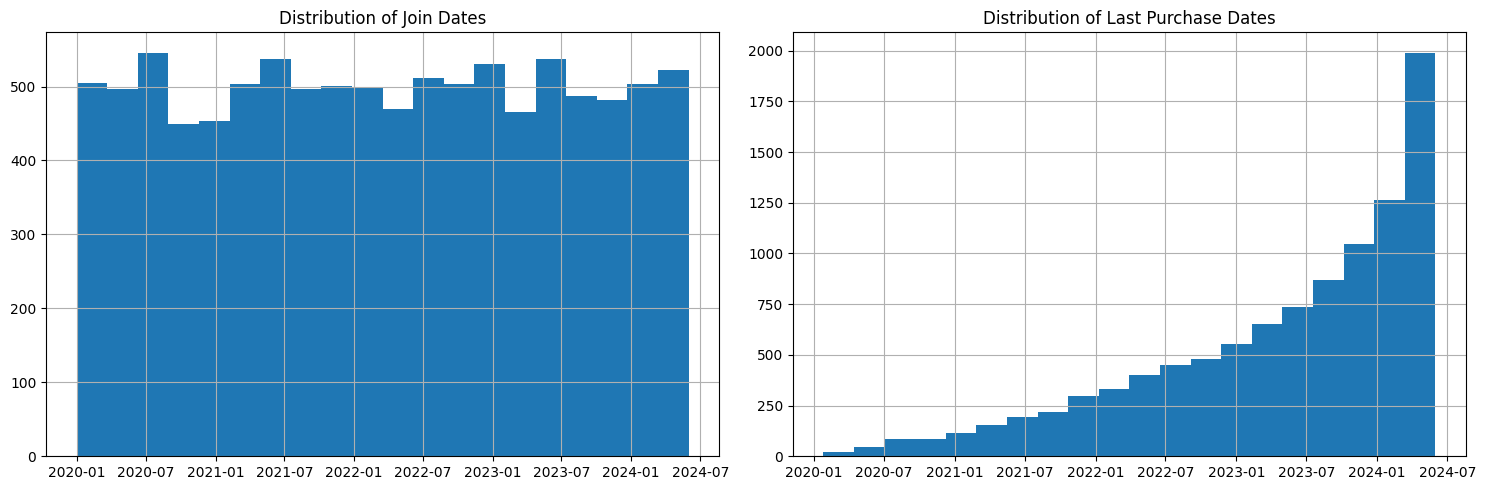


Null Values:
customer_id              0
join_date                0
last_purchase_date       0
age                   1009
gender                 533
location                 0
dtype: int64

=== Analysis for Transactions Dataset ===



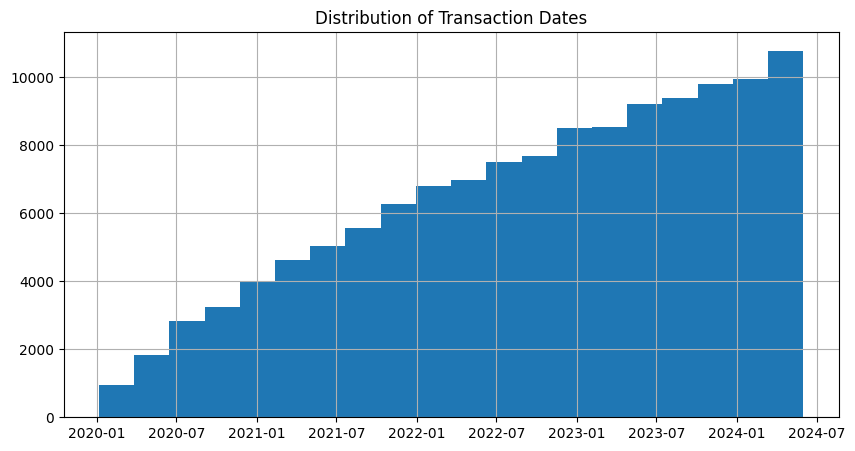

Summary Statistics:
        transaction_amount product_category
count        129545.000000           129545
unique                 NaN                3
top                    NaN      Electronics
freq                   NaN            43460
mean            597.287659              NaN
std             491.564174              NaN
min              10.020000              NaN
25%             228.320000              NaN
50%             438.380000              NaN
75%             846.980000              NaN
max            1999.990000              NaN

95th Percentile of Transaction Amount: 1707.46


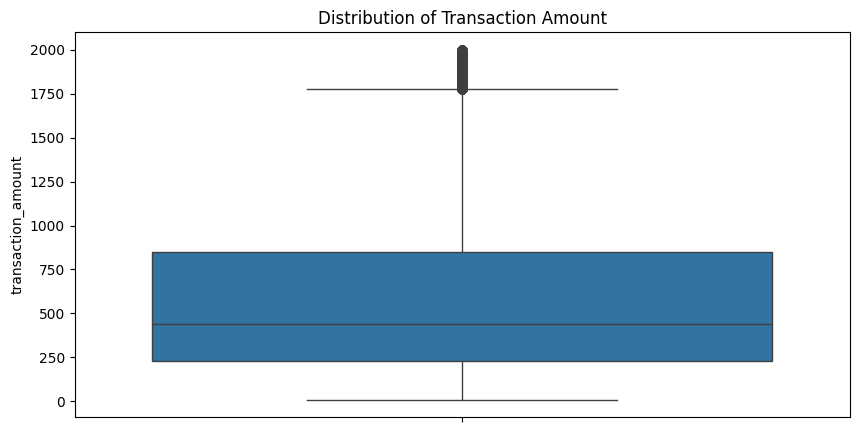

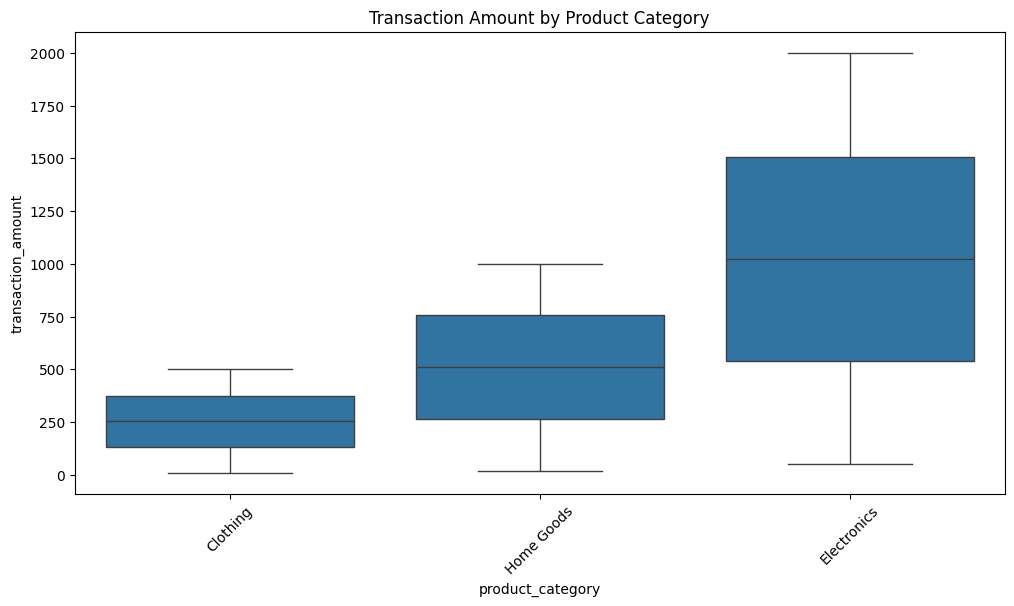


Null Values:
transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64

=== Analysis for Engagements Dataset ===

Summary Statistics:
       number_of_site_visits  number_of_emails_opened  number_of_clicks
count           10000.000000             10000.000000      10000.000000
mean              100.111900                39.862100         19.725300
std               118.625052                46.511719         22.975083
min                 1.000000                 1.000000          1.000000
25%                15.000000                 6.000000          3.000000
50%                53.000000                22.000000         11.000000
75%               141.000000                57.000000         28.000000
max               711.000000               303.000000        142.000000

95th Percentiles:
number_of_site_visits: 363.00
number_of_emails_opened: 139.00
number_of_clicks: 69.05


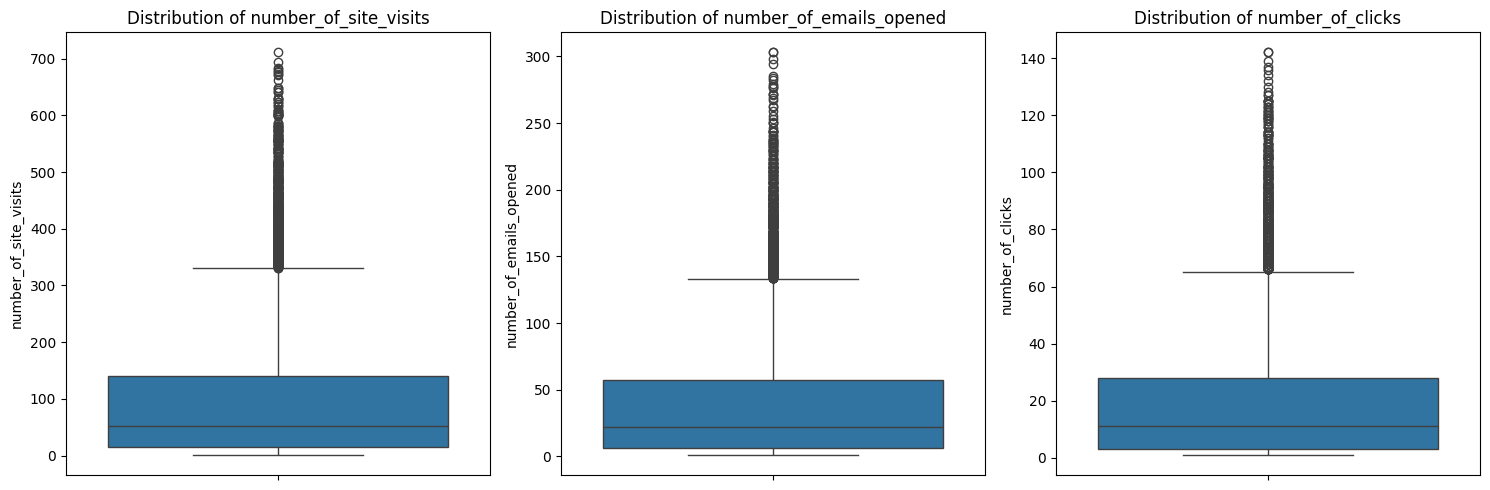


Null Values:
customer_id                0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
dtype: int64

=== Analysis for Marketing Dataset ===

Summary Statistics:
       response promotion_type                  campaign_date
count     25200          25200                          25200
unique        2              3                            NaN
top          No       Discount                            NaN
freq      12622           8430                            NaN
mean        NaN            NaN  2022-10-07 03:32:06.857142784
min         NaN            NaN            2020-01-06 00:00:00
25%         NaN            NaN            2021-12-12 00:00:00
50%         NaN            NaN            2022-12-01 00:00:00
75%         NaN            NaN            2023-09-15 00:00:00
max         NaN            NaN            2024-05-31 00:00:00


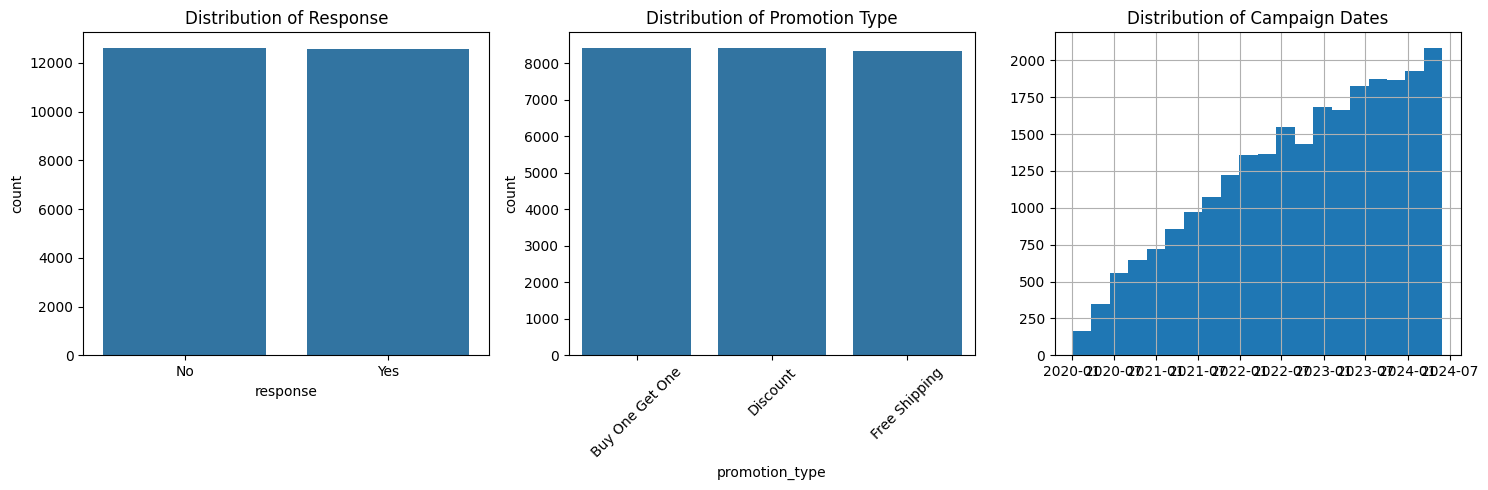


Null Values:
campaign_id       0
customer_id       0
response          0
promotion_type    0
campaign_date     0
dtype: int64


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customers(url):
    print("\n=== Analysis for Customers Dataset ===\n")
    df = pd.read_csv(url)
    
    # Convert date columns to datetime
    df['join_date'] = pd.to_datetime(df['join_date'])
    df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
    
    # Summary stats for specified columns
    print("Summary Statistics:")
    print(df[['join_date', 'last_purchase_date', 'age', 'gender', 'location']].describe(include='all'))
    
    # Boxplots for age and gender
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x='gender', y='age', data=df, ax=ax1)
    ax1.set_title('Age Distribution by Gender')
    sns.boxplot(y='age', data=df, ax=ax2)
    ax2.set_title('Age Distribution')
    plt.tight_layout()
    plt.show()
    
    # Distribution of date columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df['join_date'].hist(ax=ax1, bins=20)
    ax1.set_title('Distribution of Join Dates')
    df['last_purchase_date'].hist(ax=ax2, bins=20)
    ax2.set_title('Distribution of Last Purchase Dates')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_transactions(url):
    print("\n=== Analysis for Transactions Dataset ===\n")
    df = pd.read_csv(url)
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    
    # Distribution of transaction date
    plt.figure(figsize=(10, 5))
    df['transaction_date'].hist(bins=20)
    plt.title('Distribution of Transaction Dates')
    plt.show()
    
    # Summary stats for transaction amount and product category
    print("Summary Statistics:")
    print(df[['transaction_amount', 'product_category']].describe(include='all'))
    
    # 95th percentile for transaction amount
    print(f"\n95th Percentile of Transaction Amount: {df['transaction_amount'].quantile(0.95):.2f}")
    
    # Boxplot of transaction amount
    plt.figure(figsize=(10, 5))
    sns.boxplot(y='transaction_amount', data=df)
    plt.title('Distribution of Transaction Amount')
    plt.show()
    
    # Distribution of transaction amount by product category
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='product_category', y='transaction_amount', data=df)
    plt.title('Transaction Amount by Product Category')
    plt.xticks(rotation=45)
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_engagements(url):
    print("\n=== Analysis for Engagements Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
    
    # Summary stats and 95th percentile
    print("Summary Statistics:")
    print(df[columns].describe())
    
    print("\n95th Percentiles:")
    for col in columns:
        print(f"{col}: {df[col].quantile(0.95):.2f}")
    
    # Boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_marketing(url):
    print("\n=== Analysis for Marketing Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['response', 'promotion_type', 'campaign_date']
    df['campaign_date'] = pd.to_datetime(df['campaign_date'])
    
    # Summary stats
    print("Summary Statistics:")
    print(df[columns].describe(include='all'))
    
    # Boxplots/distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.countplot(x='response', data=df, ax=axes[0])
    axes[0].set_title('Distribution of Response')
    
    sns.countplot(x='promotion_type', data=df, ax=axes[1])
    axes[1].set_title('Distribution of Promotion Type')
    axes[1].tick_params(axis='x', rotation=45)
    
    df['campaign_date'].hist(ax=axes[2], bins=20)
    axes[2].set_title('Distribution of Campaign Dates')
    
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

# URLs of the datasets
urls = {
    'Customers': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv',
    'Transactions': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv',
    'Engagements': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv',
    'Marketing': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
}

# Analyze each dataset
analyze_customers(urls['Customers'])
analyze_transactions(urls['Transactions'])
analyze_engagements(urls['Engagements'])
analyze_marketing(urls['Marketing'])

Part II: Cleaning Data + Combining Data + Adding Features + Calculating CLV

In [109]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the datasets
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')

# Clean customers_final file
customers = customers.dropna(subset=['gender'])
avg_age = int(customers['age'].mean())
customers['age'] = customers['age'].fillna(avg_age)
print(f"Remaining customers data: {len(customers)} rows")

# Clean engagement_final file
for col in ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']:
    p95 = engagements[col].quantile(0.95)
    engagements[col] = engagements[col].clip(upper=p95)
    print(f"95th percentile for {col}: {p95}")

# Clean marketing_final file
# Create dummy variables
marketing['responded_to_Buy_One_Get_One'] = ((marketing['promotion_type'] == 'Buy One Get One') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Discount'] = ((marketing['promotion_type'] == 'Discount') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Free_Shipping'] = ((marketing['promotion_type'] == 'Free Shipping') & (marketing['response'] == 'Yes')).astype(int)

# Create new columns for response dates
marketing['Buy_One_Get_One_response_date'] = np.where(marketing['responded_to_Buy_One_Get_One'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Discount_response_date'] = np.where(marketing['responded_to_Discount'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Free_Shipping_response_date'] = np.where(marketing['responded_to_Free_Shipping'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)

# Drop specified columns
marketing = marketing.drop(columns=['response', 'promotion_type', 'campaign_date', 'campaign_id'])

# Create Cleaned_Customers
cleaned_customers = customers.merge(marketing, on='customer_id', how='left')
cleaned_customers = cleaned_customers.merge(engagements, on='customer_id', how='left')

# Ensure date columns are in datetime format
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    cleaned_customers[col] = pd.to_datetime(cleaned_customers[col])

# Group by customer_id and aggregate
cleaned_customers = cleaned_customers.groupby('customer_id').agg({
    'join_date': 'first',
    'last_purchase_date': 'first',
    'age': 'first',
    'gender': 'first',
    'location': 'first',
    'responded_to_Buy_One_Get_One': 'sum',
    'responded_to_Discount': 'sum',
    'responded_to_Free_Shipping': 'sum',
    'Buy_One_Get_One_response_date': 'max',
    'Discount_response_date': 'max',
    'Free_Shipping_response_date': 'max',
    'number_of_site_visits': 'first',
    'number_of_emails_opened': 'first',
    'number_of_clicks': 'first'
}).reset_index()

# Calculate Customer Life in Months
cleaned_customers['customer_life_months'] = (cleaned_customers['last_purchase_date'] - cleaned_customers['join_date']).dt.days / 30

# Clean transactions_final file
# Filter out customers that are filtered out in Customers_Final
transactions = transactions[transactions['customer_id'].isin(cleaned_customers['customer_id'])]

# Replace high outliers with 95th percentile
p95_transaction = transactions['transaction_amount'].quantile(0.95)
transactions['transaction_amount'] = transactions['transaction_amount'].clip(upper=p95_transaction)
print(f"95th percentile for transaction_amount: {p95_transaction}")

# Drop transaction_id
transactions = transactions.drop(columns=['transaction_id'])

# Ensure transaction_date is in the correct format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Calculate total spend per customer
customer_spend = transactions.groupby('customer_id')['transaction_amount'].sum().reset_index()
customer_spend.columns = ['customer_id', 'Monetary']

# Merge total spend back to cleaned_customers
cleaned_customers = cleaned_customers.merge(customer_spend, on='customer_id', how='left')

# Calculate Monthly Spend
cleaned_customers['monthly_spend'] = cleaned_customers['Monetary'] / cleaned_customers['customer_life_months']

# Calculate Recency
reference_date = datetime(2024, 7, 5) # Assume that this frozen date is today for simplification purposes (and that it does not change when others run the code)
cleaned_customers['Recency'] = (reference_date - cleaned_customers['last_purchase_date']).dt.days

# Calculate Frequency
transaction_frequency = transactions.groupby('customer_id').size().reset_index(name='total_transactions')
cleaned_customers = cleaned_customers.merge(transaction_frequency, on='customer_id', how='left')
cleaned_customers['Frequency'] = cleaned_customers['total_transactions'] / cleaned_customers['customer_life_months']

# Calculate percentage of spend by product category
category_spend = transactions.groupby(['customer_id', 'product_category'])['transaction_amount'].sum().unstack(fill_value=0)
category_spend_pct = category_spend.div(category_spend.sum(axis=1), axis=0)
category_spend_pct.columns = [f'{col} %' for col in category_spend_pct.columns]

# Merge category spend percentages back to cleaned_customers
cleaned_customers = cleaned_customers.merge(category_spend_pct, on='customer_id', how='left')

# Save the cleaned datasets
cleaned_customers.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Customers.csv', index=False)
transactions.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Transactions.csv', index=False)

print("\nCleaned datasets have been saved to:")
print(r"C:\Users\Numan\Desktop\Cleaned_Customers.csv")
print(r"C:\Users\Numan\Desktop\Cleaned_Transactions.csv")

Remaining customers data: 9467 rows
95th percentile for number_of_site_visits: 363.0
95th percentile for number_of_emails_opened: 139.0
95th percentile for number_of_clicks: 69.04999999999927
95th percentile for transaction_amount: 1706.63

Cleaned datasets have been saved to:
C:\Users\Numan\Desktop\Cleaned_Customers.csv
C:\Users\Numan\Desktop\Cleaned_Transactions.csv


Part III: Trying 6 Machine Learning Models

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Feature Engineering
def feature_engineering(df):
    # Create a new feature for total response
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    
    # Create a new feature for engagement score
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    
    # Create a new feature for average transaction value
    df['avg_transaction_value'] = df['Monetary'] / df['Frequency']
    
    # Create a new feature for product diversity
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    
    # Bin age into categories
    df['age_group'] = pd.cut(df['age'], 
                             bins=[0, 18, 25, 35, 45, 55, 65, np.inf], 
                             labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model
features = ['age_group', 'gender', 'activity_score', 'number_of_site_visits', 
            'number_of_emails_opened', 'number_of_clicks', 'Recency', 'Monetary', 
            'Frequency', 'monthly_spend', 'total_transactions', 'Clothing %', 
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'avg_transaction_value', 'product_diversity']

# Prepare the data
X = pd.get_dummies(df[features], columns=['age_group', 'gender'])
y = df['customer_life_months']

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Function to evaluate models
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test):
    model.fit(X_train, y_train)
    
    # Predictions
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Validation metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    
    return val_mse, val_r2, test_mse, test_r2, cv_mse

# Evaluate all models
results = {}

for name, model in models.items():
    val_mse, val_r2, test_mse, test_r2, cv_mse = evaluate_model(
        model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test
    )
    results[name] = {
        'Validation MSE': val_mse,
        'Validation R2': val_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Cross-validation MSE': cv_mse
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Find the best model based on test R2 score
best_model = max(results, key=lambda x: results[x]['Test R2'])
print(f"\nBest Model: {best_model}")


Linear Regression Results:
Validation MSE: 12.1017
Validation R2: 0.9055
Test MSE: 13.0824
Test R2: 0.9113
Cross-validation MSE: 13.2782

Ridge Regression Results:
Validation MSE: 12.0879
Validation R2: 0.9056
Test MSE: 13.0810
Test R2: 0.9113
Cross-validation MSE: 13.2688

Lasso Regression Results:
Validation MSE: 16.1150
Validation R2: 0.8742
Test MSE: 18.1323
Test R2: 0.8770
Cross-validation MSE: 17.5018

Random Forest Results:
Validation MSE: 4.3886
Validation R2: 0.9657
Test MSE: 4.1950
Test R2: 0.9715
Cross-validation MSE: 4.4585

Gradient Boosting Results:
Validation MSE: 2.5436
Validation R2: 0.9801
Test MSE: 2.4018
Test R2: 0.9837
Cross-validation MSE: 2.6763

SVR Results:
Validation MSE: 10.3116
Validation R2: 0.9195
Test MSE: 10.9523
Test R2: 0.9257
Cross-validation MSE: 12.8239

Best Model: Gradient Boosting


Part IV: Suspiciously high R2 scores. Focusing on Gradient Boosting Model + Top Features + Checking Data Leakage

Note: Further Optimized by Filtering Out Customers Joined 2024 Onward + Getting Rid of Data Leakage by Removing Time-Based Features

Gradient Boosting Results:
Train MSE: 4.6738
Train R2: 0.9890
Validation MSE: 194.7553
Validation R2: 0.5186
Test MSE: 41.9780
Test R2: 0.6687

Top 10 Features:
                 feature  importance
0         activity_score    0.483111
1             Clothing %    0.170858
2     total_transactions    0.150373
3               Monetary    0.067488
4                Recency    0.054820
5          Electronics %    0.028578
6           Home Goods %    0.023297
7  number_of_site_visits    0.007591
8       number_of_clicks    0.004847
9       engagement_score    0.004580


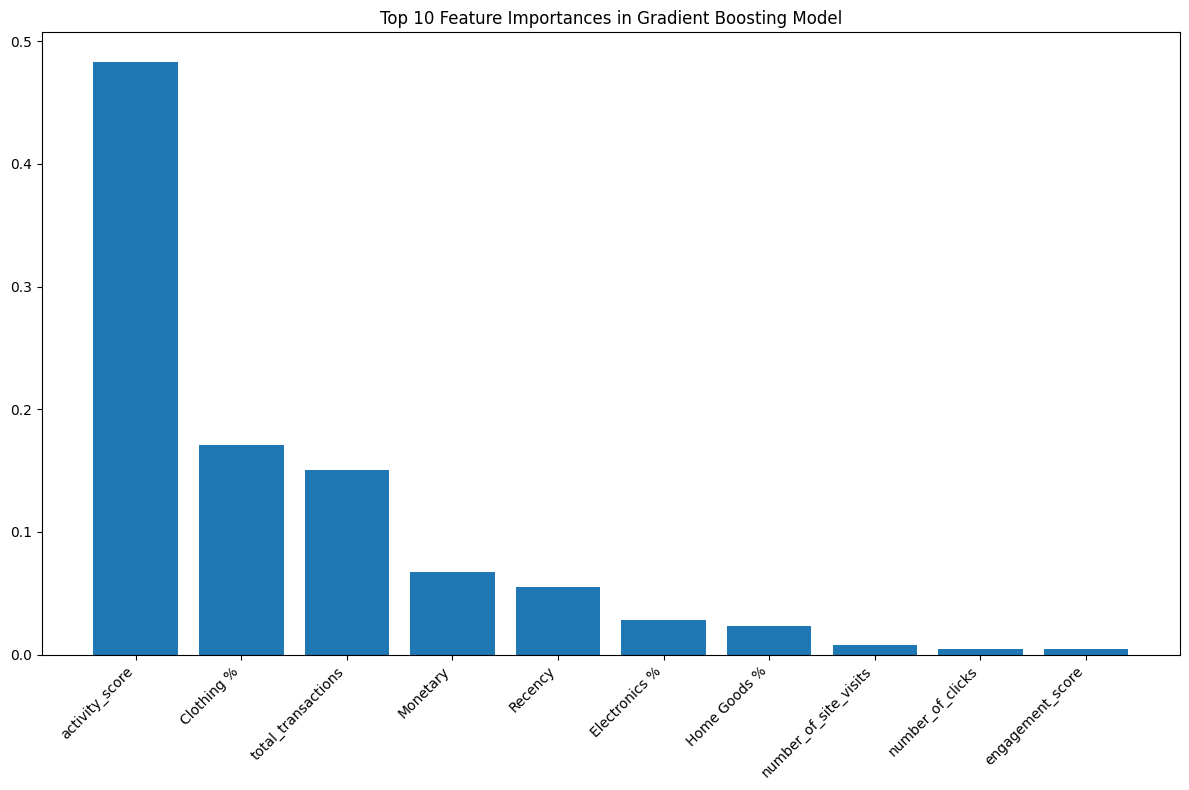

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Convert join_date to datetime
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter out customers who joined in 2024
df = df[df['join_date'].dt.year < 2024]

# Feature Engineering
def feature_engineering(df):
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    df['age_group'] = pd.cut(df['age'], 
                             bins=[0, 18, 25, 35, 45, 55, 65, np.inf], 
                             labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model, excluding Frequency and avg_transaction_value
features = ['activity_score', 'number_of_site_visits', 
            'number_of_emails_opened', 'number_of_clicks', 'Recency', 'Monetary', 
            'total_transactions', 'Clothing %', 
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity']

# Target variable
target = 'Frequency'

# Prepare the data
X = df[features]
y = df[target]

# Remove rows with infinite or extremely large values
X = X.replace([np.inf, -np.inf], np.nan)
mask = ~(X.isna().any(axis=1) | y.isna() | np.isinf(y) | (np.abs(y) > 1e300))
X = X[mask]
y = y[mask]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# First, split off the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a dataset_type column
df['dataset_type'] = 'Train'

# Create boolean masks for validation and test sets
val_mask = df.index.isin(X_val.index)
test_mask = df.index.isin(X_test.index)

# Assign dataset types using boolean indexing
df.loc[val_mask, 'dataset_type'] = 'Validation'
df.loc[test_mask, 'dataset_type'] = 'Test'

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Calculate metrics
train_mse = mean_squared_error(y_train, gb_model.predict(X_train_scaled))
train_r2 = r2_score(y_train, gb_model.predict(X_train_scaled))
val_mse = mean_squared_error(y_val, gb_model.predict(X_val_scaled))
val_r2 = r2_score(y_val, gb_model.predict(X_val_scaled))
test_mse = mean_squared_error(y_test, gb_model.predict(X_test_scaled))
test_r2 = r2_score(y_test, gb_model.predict(X_test_scaled))

print("Gradient Boosting Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R2: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")

# Get feature importances
feature_importance = gb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print top 10 features
print("\nTop 10 Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Part V: Improving Model Accuracy Attempt I

Gradient Boosting Results:
Train MSE: 13.0781
Train R2: 0.9049
Validation MSE: 19.8311
Validation R2: 0.8600
Test MSE: 21.6962
Test R2: 0.8474

Top 10 Features:
                   feature  importance
0           activity_score    0.728889
1         number_of_clicks    0.111743
2  number_of_emails_opened    0.082795
3    number_of_site_visits    0.030549
4                  Recency    0.019862
5             Home Goods %    0.007108
6               Clothing %    0.006668
7                 Monetary    0.006616
8            Electronics %    0.003389
9       total_transactions    0.001081


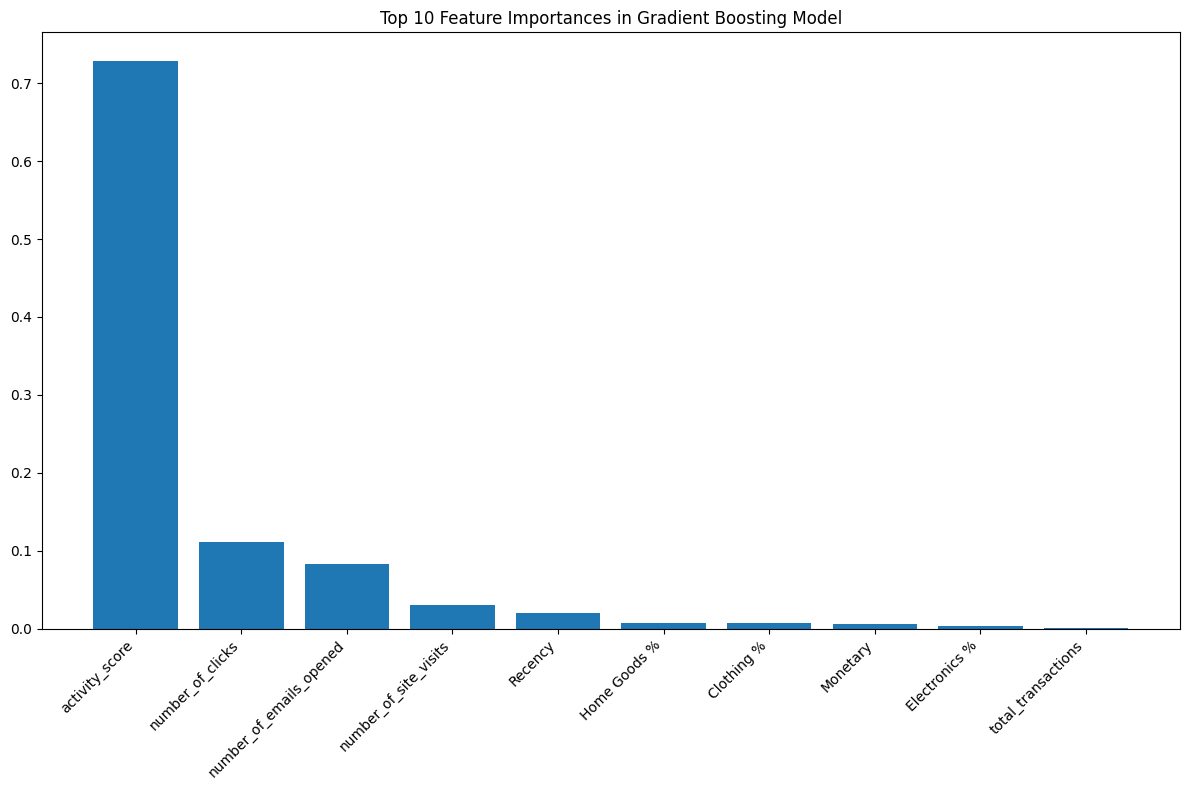

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data from the provided URL
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Convert join_date to datetime
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter out customers who joined before March 2024
df = df[df['join_date'] < '2024-03-01']

# Feature Engineering
def feature_engineering(df):
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model, excluding Frequency and avg_transaction_value
features = ['gender', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',  
            'total_transactions', 'Clothing %', 'Recency', 'Monetary',
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity', 'activity_score']

# Prepare the data
X = pd.get_dummies(df[features], columns=['gender'])
y = df['customer_life_months']

# Handle infinite values and impute missing values
X = X.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# First, split off the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a dataset_type column
df['dataset_type'] = 'Train'
df.loc[y_val.index, 'dataset_type'] = 'Validation'
df.loc[y_test.index, 'dataset_type'] = 'Test'

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions for all data points
X_all_scaled = scaler.transform(X)
all_predictions = gb_model.predict(X_all_scaled)

# Add predictions to the dataframe
df['prediction'] = all_predictions

# Calculate metrics
train_mse = mean_squared_error(y_train, gb_model.predict(X_train_scaled))
train_r2 = r2_score(y_train, gb_model.predict(X_train_scaled))
val_mse = mean_squared_error(y_val, gb_model.predict(X_val_scaled))
val_r2 = r2_score(y_val, gb_model.predict(X_val_scaled))
test_mse = mean_squared_error(y_test, gb_model.predict(X_test_scaled))
test_r2 = r2_score(y_test, gb_model.predict(X_test_scaled))

print("Gradient Boosting Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R2: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")

# Get feature importances
feature_importance = gb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print top 10 features
print("\nTop 10 Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Part VI: Residual Analysis

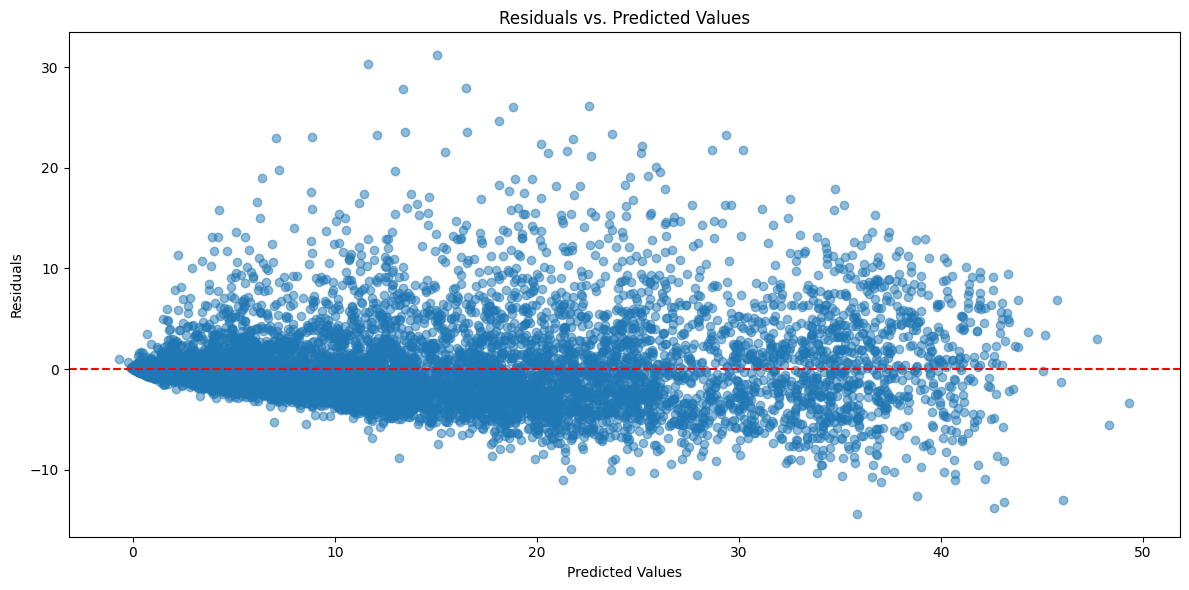

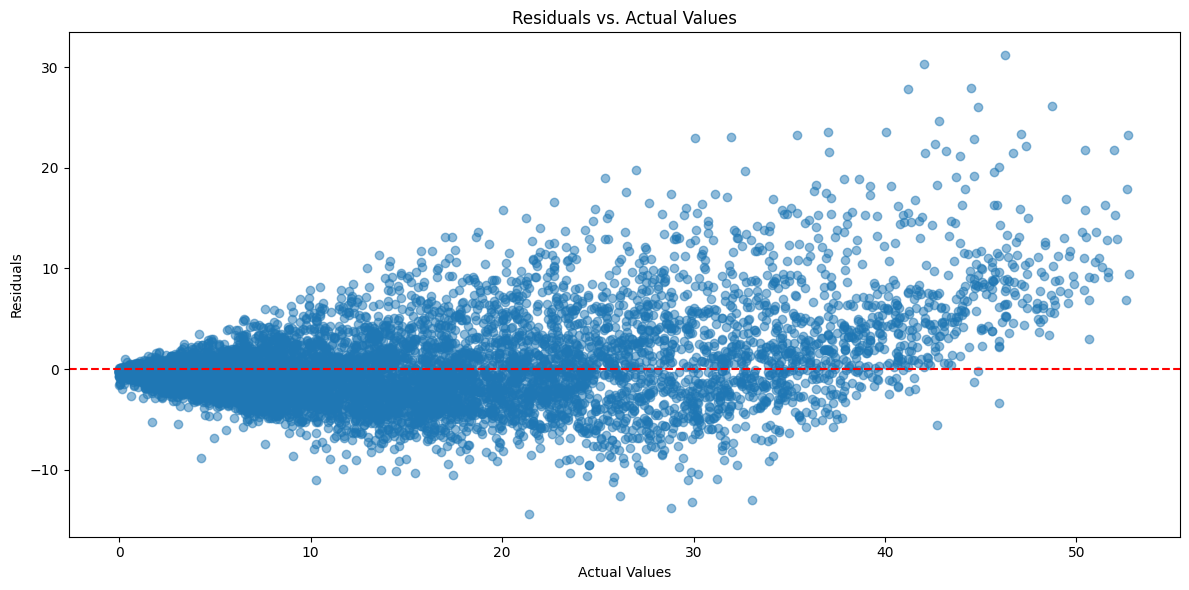

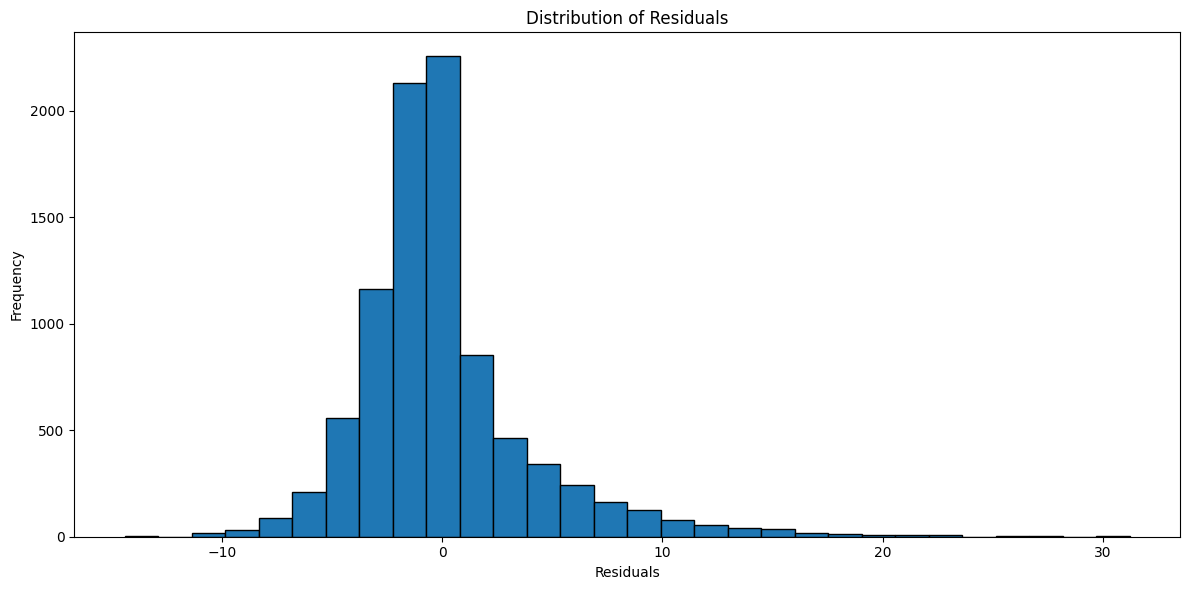

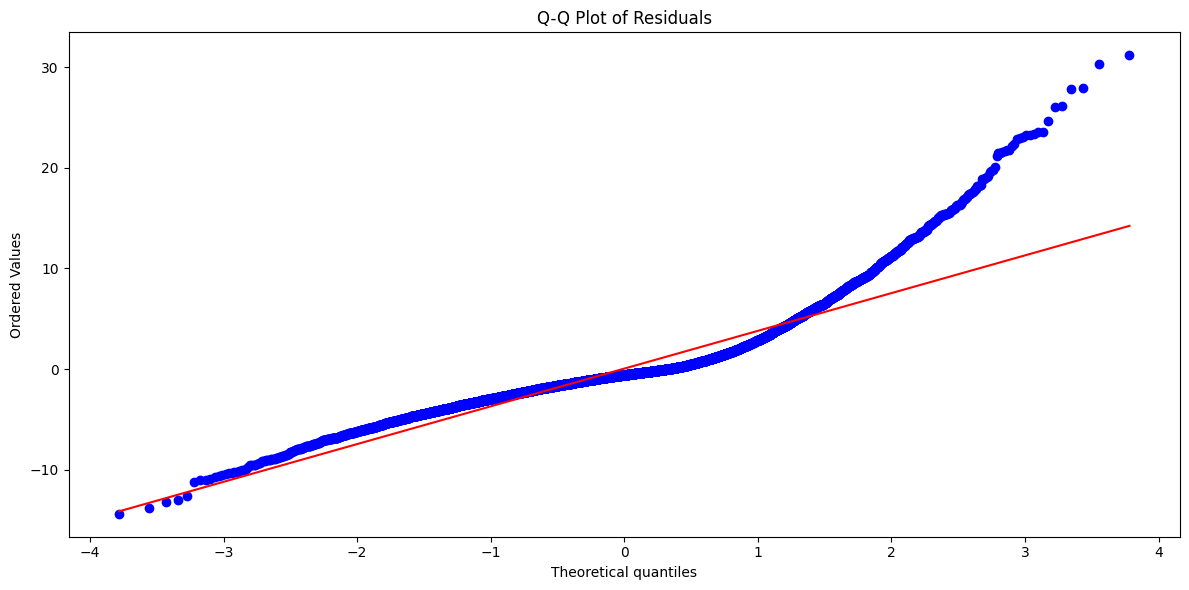

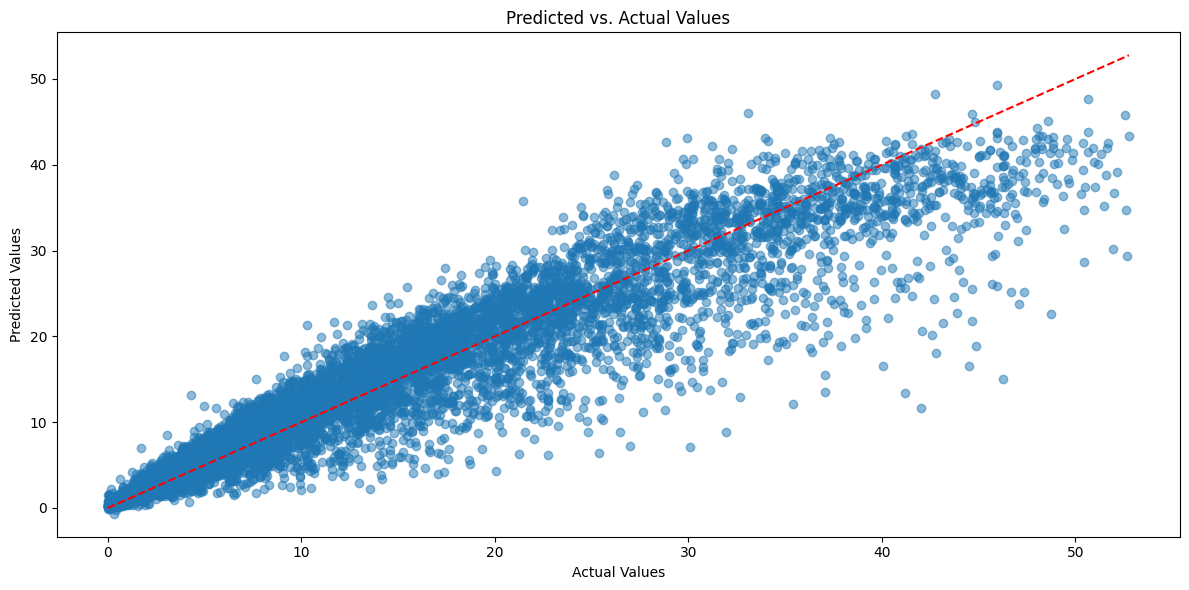

Residuals Summary Statistics:
count    8919.000000
mean        0.041454
std         4.019048
min       -14.402213
25%        -2.088893
50%        -0.588878
75%         1.116265
max        31.211162
Name: residuals, dtype: float64


In [113]:
# Calculate residuals
df['residuals'] = df['customer_life_months'] - df['prediction']

# Plot the residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(df['prediction'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(12, 6))
plt.hist(df['residuals'], bins=30, edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Q-Q plot of residuals
import scipy.stats as stats
plt.figure(figsize=(12, 6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['prediction'], alpha=0.5)
plt.plot([df['customer_life_months'].min(), df['customer_life_months'].max()], 
         [df['customer_life_months'].min(), df['customer_life_months'].max()], 
         color='red', linestyle='--')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Residuals summary statistics
residuals_summary = df['residuals'].describe()
print("Residuals Summary Statistics:")
print(residuals_summary)
